<div style="text-align: right"><small>pierre-henri.wuillemin@lip6.fr<br/>git clone https://gitlab.lip6.fr/phw/projetMdC2018.git
<br/>last version : <b>28/03/2018</b><br/>2018-fev</small></div>
# 3i005 -Projet 3 - Chaîne de Markov - semaine 1

Le  but de ce projet est de fournir une plateforme d'étude des Chaîne de Markov (CdM) à temps discret, à états discrets.

Il s'agira donc de réaliser un ensemble de codes qui permettront de facilement modéliser puis analyser une chaîne de Markov. Globalement, le projet aura 3 phases :
1. Définir un cadre de modèlisation et de visualisation pour les CdM
2. Proposer des algorithmes sur les CdM
3. Discussions et analyses des modèles et algorithmes basés sur un chaîne de Markov complexe.

## Préambule technique
Le projet prendra la forme d'un ensemble de fichiers `python` (**python3**) et un rapport. Il utilisera fortement la programmation objet. Même si ce n'est pas forcément très _pythonesque_, on s'attachera à ce sujet à définir une classe dans un fichier de même nom (sauf si spécification contraire). 

Ce notebook (`semaine1.ipynb`) est normalement directement exécutable néanmoins, si vous le préférez, vous pouvez également recopier vos codes de test dans un fichier python classique `semaine1.py`. Si vous êtes y êtes habitués ou si vous voulez vous y habituer, n'hésitez pas à utiliser des _frameworks_ de test comme [`nosetest`](http://pythontesting.net/framework/nose/nose-introduction/) , etc. Le rapport devra bien évidemment contenir un préambule technique pour expliquer vos choix et la manière d'exécuter vos codes.

> L'énoncé du projet et les sources se trouvent dans un repository gitlab :
> ```bash
> git clone https://gitlab.lip6.fr/phw/projetCdM2018.git
> ```
>
> **À l'ARI, pensez à configurer le proxy :**
> ```bash
> git config --global http.proxy proxy:3128
> ```

Les codes source qui vous sont fournis sont 
- `CdM.py` qui contient une version à compléter de la classe `CdM`,
- `FeuRouge.py` qui contient une version de la classe ` FeuRouge`,
- `utils.py` qui contient quelques fonctions utilitaires.

Le répertoire que vous rendrez, compressé en `tar.gz` devra contenir 
> - ces fichiers et d'autres que vous créerez en cours de projet. Une partie de la correction correspondra à l'exécution d'un code fichier qui aura comme prérequis l'existence de ces fichier. Si il ne peut pas s'exécuter, ce sera considéré comme une faute dans le projet. **Le nom des fichiers, classes, méthodes et attributs sont donc à respecter scrupuleusement** si il est spécifié dans l'énoncé.
> - un `rapport.pdf` qui contiendra le rapport. 
> - Une **attention** particulière est demandée en ce qui concerne la qualité de la documentation de votre code (docstring).


## Choix pour une implémentation
Une chaîne de Markov est définie par une structure de données comprenant :
- un ensemble d'états ($S$), la variable $X_t \in S$ indique l'état à l'instant $t$. 
- un modèle de transition spécifiant complètement les distributions $P(X_t|X_{t-1})$
- une distribution particulière $P(X_0)$

Dans notre implémentation, il s'agit de pouvoir définir le plus facilement une telle structure. En particulier, la spécification d'une distribution de probabilités peut être complexe.

Comme dans le cadre des CdM, il arrive fréquemment qu'une distribution soit assez 'creuse'. Au lieu de représenter la distribution comme un vecteur, nous nous focaliserons sur le support de la distribution en utilisant un dictionnaire plutôt qu'un vecteur.

Soit une variable aléatoire $X \in \{1,\cdots,10\}$, soit une distribution de probabilité $P$ telle que $P(X=4)=0.8$ et $P(X=6)=0.2$, cette distribution peut être représentée par :
- un vecteur `[0,0,0,0.8,0,0.2,0,0,0,0]`,
- un dictionnaire `{4=>0.8,6=>0.2}`. Nous appelerons __distribution__ la représentation par dictionnaire.

Nous privéligierons la représentation par distribution, naturelle en python, bien qu'il faudra se donner parfois les moyens de passer du vecteur à la distribution, ou réciproquement.

### Idée de l'implémentation : une classe abstraite pour les CdM, à spécialiser par surcharge

Un CdM devra donc implementer principalement 3 services :
```python
  def get_states(self):
    """
    :return: un ensemble d'états énumérable (list, n-uple, etc.)
    """

  def get_transition_distribution(self, state):
    """
    :param state: état initial
    :return: un dictionnaire {etat:proba} représentant l'ensemble des états atteignables à partir de state et leurs probabiblités
    """

  def get_initial_distribution(self):
    """
    :return: un dictionnaire représentant la distribution à t=0 {etat:proba}
    """
```
et c'est tout. **Le reste du code devrait être générique et ne devrait pas dépendre de la chaîne de Markov actuellement implémentée.**

Nos chaînes de Markov seront donc représentées par des classes, spécialisant une classe abstraite `CdM` et pouvant se limiter à surcharger ces 3 méthodes.

![Diagramme de classes issues de `CdM`](images/hierarchyCdM.png)

### Exemple du feu rouge
Soit une chaîne de Markov représentant (de manière très approximative) le comportement d'un feu rouge :
1. un feu rouge peut être dans un des 3 états : rouge, orange, vert
2. un feu rouge possède une transition indiquant 
  - qu'il peut passer au vert quand il est rouge, 
  - qu'il peut passer à l'orange quand il est vert, 
  - qu'il peut passer au rouge quand il est orange.
3. enfin, on suppose qu'à $t=0$, le feu est plus probablement rouge que vert, mais pas orange.

Ce qui donnera :

In [1]:
import numpy as np
from CdM import CdM
# feu rouge hérite de CdM
class FeuRouge(CdM):
  def __init__(self):
    super(FeuRouge,self).__init__()
        
  def get_states(self):
    return ['Rouge', 'Orange', 'Vert']

  def get_transition_distribution(self, state):
    if state == 'Rouge':
      return {'Rouge': 0.8, 'Vert': 0.2}
    elif state == 'Orange':
      return {'Orange': 0.7, 'Rouge': 0.3}
    elif state == 'Vert':
      return {'Vert': 0.8, 'Orange': 0.2}
    else:
      raise IndexError

  def get_initial_distribution(self):
    return {'Vert': 0.3, 'Rouge': 0.7}

Remarquer la méthode de construction `__init__` qui appelle en ligne 5 la construction de `CdM` afin de construire certaines représentations internes du CdM.

### Question 1
Construire une classe `MouseInMaze` (dans un fichier `MouseInMaze.py` donc) représentant l'exemple du cours de la souris dans le labyrinthe. On remarquera que, dans ce CdM, les états sont les entiers de 1 à 6.

## Partie I - Enrichissement de `CdM.py`

Dans cette partie, nous instrumentons la classe `CdM` d'un ensemble de méthodes génériques permettant de manipuler et de visualiser tous les `CdM`.

Dans toutes les représentations internes (graphe, matrice, etc.), les états seront plus facilement manipulable par leurs indices (de $0$ à $N-1$ où $N$ est le nombre d'état de la chaîne de Markov). Il s'agit donc de se donner le moyen de passer facilement d'un état à son indice.

### Question 2 : stateToIndex
Dans la méthode `CdM.__init__`, définir un attribut `stateToIndex` qui permettra cette traduction d'état à indice. Par exemple, 

In [2]:
f=FeuRouge()
print(f.stateToIndex)

# matrix = np.matrix([5, 5, 5])
# # np.insert(matrix, [4, 4, 4])
# matrix2 = np.matrix([4, 4, 4])
# l1 = [5, 5, 5]
# l2 = [8, 8, 8]
# np.stack((l1, l2))

{'Vert': 2, 'Orange': 1, 'Rouge': 0}


### Question 3 : distributions et vecteurs
Proposer des méthodes `CdM.distribution_to_vector` et `CdM.vector_to_distribution` permettant de passer de la représentation en dictionnaire (distribution) à la représentation vectorielle des probabilités sur les états.

In [3]:
f=FeuRouge()
f.distribution_to_vector({"Rouge":0.7,"Vert":0.3})

array([0.7, 0. , 0.3])

In [4]:
f=FeuRouge()
f.vector_to_distribution(np.array([0,0.5,0.5]))

{'Orange': 0.5, 'Vert': 0.5}

Proposer une méthode `CdM.show_distribution` permettant de représenter une distribution par exemple (de manière générique) comme son vecteur associé.

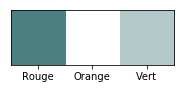

In [5]:
f=FeuRouge()
f.show_distribution(f.get_initial_distribution())

On peut facilement voir comment spécialiser `FeuRouge.show_distribution` par surcharge :

In [6]:
from CdM import CdM

import matplotlib.pyplot as plt
%matplotlib inline  

import utils

# re-définition de FeuRouge
class FeuRouge(CdM):
  def __init__(self):
    super(FeuRouge,self).__init__()
        
  def get_states(self):
    return ['Rouge', 'Orange', 'Vert']

  def get_transition_distribution(self, state):
    if state == 'Rouge':
      return {'Rouge': 0.8, 'Vert': 0.2}
    elif state == 'Orange':
      return {'Orange': 0.7, 'Rouge': 0.3}
    elif state == 'Vert':
      return {'Vert': 0.8, 'Orange': 0.2}
    else:
      raise IndexError

  def get_initial_distribution(self):
    return {'Vert': 0.3, 'Rouge': 0.7}

  def show_distribution(self, distribution):
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 1)
    ax.set_yticks([])
    ax.set_xticklabels(self.get_states())
    ax.set_xticks([0, 1, 2])
    ax.imshow(self.distribution_to_vector(distribution).reshape(1, 3), cmap=utils.ProbaMap)

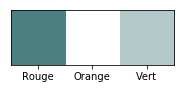

In [7]:
f=FeuRouge()
f.show_distribution(f.get_initial_distribution())

### Question 4 : matrice de transition

Proposer une méthode `CdM.get_transition_matrix` qui permet de construire un `numpy.array` représentant la matrice de transition du MdP


In [8]:
f=FeuRouge()
f.get_transition_matrix()

array([[0.8, 0. , 0.2],
       [0. , 0.2, 0.8],
       [0.3, 0.7, 0. ]])

Remarquer qu'une méthode `CdM.show_transition_matrix` vous est fournie pour présenter graphiquement cette matrice (utile lorsque la matrice est de grande taille). Cette méthode utilise votre implémentation de `CdM.get_transition_matrix`.

In [9]:
f=FeuRouge()
# f.show_transition_matrix()

### Représentation et visualisation de graphes
Représenter un graphe de transition nécessite une implémentation de graphe. Il en existe plusieurs sous python (networkx, pydot, pydotplus, etc.). Nous allons utiliser pyAgrum. En voici un exemple d'utilisation :

In [10]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb # sous spyder : import pyAgrum.lib.ipython as gnb

#créer un graph orienté
g=gum.DiGraph()

#créer 3 noeuds 0, 1 et 2
g.addNode()
g.addNode()
g.addNode()

#créer des arcs 0->1, 1->2 et 0->2
g.addArc(0,1)
g.addArc(1,2)
g.addArc(0,2)

#retrouver les enfants du noeud 0
print("enfants de 0 : "+str(g.children(0)))
#retrouver les parents du noeud 1
print("parents de 1 : "+str(g.parents(1)))

enfants de 0 : {1, 2}
parents de 1 : {0}


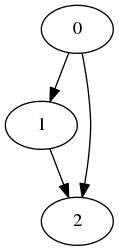

In [11]:
#dessiner le graph
gnb.showDot(g.toDot())

La fonction `showDot` permet de dessiner un graphe à partir d'une syntaxe `dot` qui permet de représenter un graphe par un texte. Par exemple :

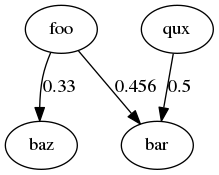

In [12]:
 
gnb.showDot('''
digraph {
  1 [label="foo"];
  2 [label="bar"];
  3 [label="baz"];
  4 [label="qux"];
  
  1->3 [label=0.33];
  4->2 [label=0.5];
  1->2 [label=0.456];
}
    ''')


### Question 5 : graphe de transition
Écrire une fonction ` CdM.get_transition_graph` qui crée un `gum.DiGraph` représentant la structure du graphe de transition (sans les paramètres).

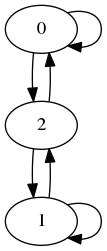

In [13]:
f=FeuRouge()
gnb.showDot(f.get_transition_graph().toDot())

Écrire une fonction `CdM.show_transition_graph(gnb)` qui dessine le graphe de transition (avec les paramètres). Le paramètre `gnb` est le module qu'on utilise pour dessiner. (soit `import pyAgrum.lib.notebook as gnb` sous notebook, soit `import pyAgrum.lib.ipython as gnb` sous spyder, ipython, etc.).

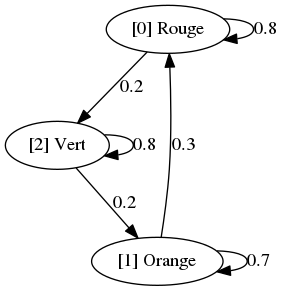

In [14]:
f=FeuRouge()
f.show_transition_graph(gnb)

Remarquer que dans les noeuds, on affiche le nom et l'indice de l'état. Sur les arcs, on affiche les probabilités de transition.

### Question 6 : vérifier que tout fonctionne avec MouseInMaze

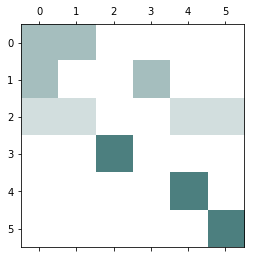

In [15]:
from MouseInMaze import MouseInMaze
m=MouseInMaze()
m.show_transition_matrix()

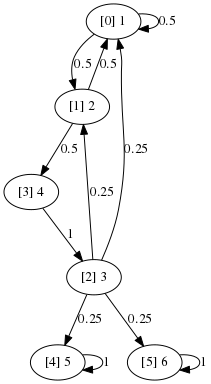

In [16]:
m.show_transition_graph(gnb)

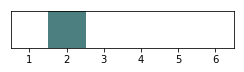

In [17]:
m.show_distribution(m.get_initial_distribution())

### Question 7 : MonoBestiole 
Proposer dans `MonoBestiole.py`, une implémentation de la `MonoBestiole` proposée dans le cours. Vous pouvez vous amuser à la généraliser un petit peu. Par exemple, en paramétrant $N$ le nombre d'états, la probabilité $p$ d'aller à droite et la probabilité d'aller à gauche $q$  ($p+q\leq 1$)

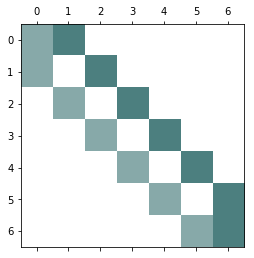

In [18]:
from MonoBestiole import MonoBestiole
b=MonoBestiole(7,0.6,0.4)
b.show_transition_matrix()

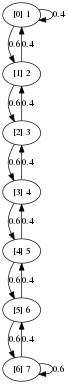

In [19]:
b.show_transition_graph(gnb)

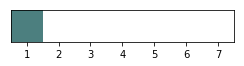

In [20]:
b.show_distribution(b.get_initial_distribution())

### Question 8 : analyse du graphe de transition

Écrire les méthodes `CdM.get_communication_classes()`, `CdM.get_absorbing_classes()` qui permettent d'analyser le graphe de transition. Attention au type de retour ! (`list` de `set`).

Écrire également la méthode `CdM.is_irreducible()`.

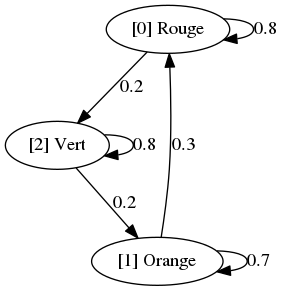

Composantes fortement connexes : [{0, 1, 2}]
Sous-chaines de Markov irréductibles : [{0, 1, 2}]
Irréductible : True


In [21]:
f=FeuRouge()
f.show_transition_graph(gnb)
print("Composantes fortement connexes : "+str(f.get_communication_classes()))
print("Sous-chaines de Markov irréductibles : "+str(f.get_absorbing_classes()))
print("Irréductible : "+str(f.is_irreducible()))

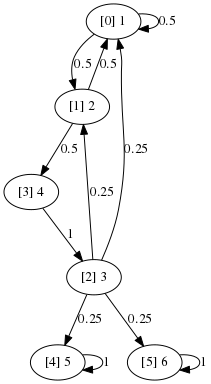

Composantes fortement connexes : [{0, 1, 2, 3}, {4}, {5}]
Sous-chaines de Markov : [{4}, {5}]
Irréductible : False


In [22]:
m=MouseInMaze()
m.show_transition_graph(gnb)
print("Composantes fortement connexes : "+str(m.get_communication_classes()))
print("Sous-chaines de Markov : "+str(m.get_absorbing_classes()))
print("Irréductible : "+str(m.is_irreducible()))
# print("Apériodique : "+str(m.is_aperiodic()))

Enfin, écrire les méthodes `CdM.get_periodicity()` qui calcule la périodicité d'une chaîne de Markov et ` CdM.is_aperiodic()` qui indique si une CdM est apériodique.

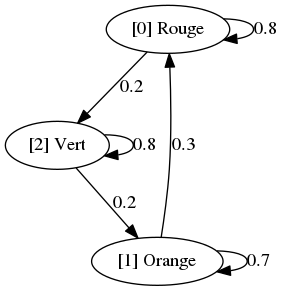

Apériodique : True
Périodicité : 1


In [23]:
f=FeuRouge()
f.show_transition_graph(gnb)
print("Apériodique : "+str(f.is_aperiodic()))
print("Périodicité : "+str(f.get_periodicity()))

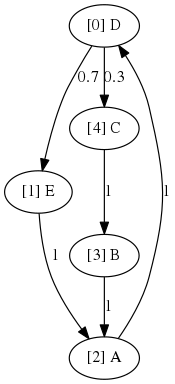

Apériodique : True
Périodicité : 1


In [24]:
from CdM import CdM
import matplotlib.pyplot as plt
import utils

# Définition d'une CdM apériodique
class AperiodicCdM(CdM):
  def __init__(self):
    super().__init__()
        
  def get_states(self):
    return "DEABC"

  def get_transition_distribution(self, state):
    if state == 'A':
      return {'D': 1}
    elif state == 'B':
      return {'A': 1}
    elif state == 'C':
      return {'B': 1}
    elif state == 'D':
      return {'C': 0.3,'E':0.7}
    elif state == 'E':
      return {'A': 1}
    else:
      raise IndexError

  def get_initial_distribution(self):
    return {'A': 1}

a=AperiodicCdM()
a.show_transition_graph(gnb)
print("Apériodique : "+str(a.is_aperiodic()))
print("Périodicité : "+str(a.get_periodicity()))

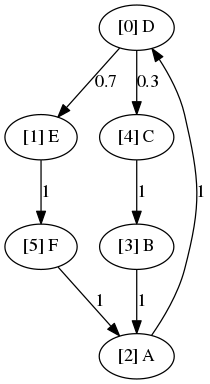

Apériodique : False
Périodicité : 4


In [25]:
from CdM import CdM
import matplotlib.pyplot as plt
import utils

# Définition d'une CdM périodique
class PeriodicCdM(CdM):
  def __init__(self):
    super().__init__()
        
  def get_states(self):
    return "DEABCF"

  def get_transition_distribution(self, state):
    if state == 'A':
      return {'D': 1}
    elif state == 'B':
      return {'A': 1}
    elif state == 'C':
      return {'B': 1}
    elif state == 'D':
      return {'C': 0.3,'E':0.7}
    elif state == 'E':
      return {'F': 1}
    elif state == 'F':
      return {'A': 1}
    else:
      raise IndexError

  def get_initial_distribution(self):
    return {'A': 1}

p=PeriodicCdM()
p.show_transition_graph(gnb)
print("Apériodique : "+str(p.is_aperiodic()))
print("Périodicité : "+str(p.get_periodicity()))

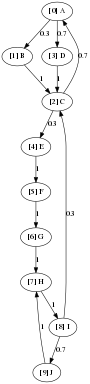

Apériodique : True
Périodicité : 1


In [26]:
from CdM import CdM
import matplotlib.pyplot as plt
import utils

# Définition d'une CdM périodique plus grand
class BiggerPeriodicCdM(CdM):
  def __init__(self):
    super().__init__()
        
  def get_states(self):
    return "ABCDEFGHIJ"

  def get_transition_distribution(self, state):
    if state == 'A':
      return {'B': 0.3,'D':0.7}
    elif state == 'B':
      return {'C': 1}
    elif state == 'C':
      return {'E': 0.3,'A':0.7}
    elif state == 'D':
      return {'C': 1}
    elif state == 'E':
      return {'F': 1}
    elif state == 'F':
      return {'G': 1}
    elif state == 'G':
      return {'H': 1}
    elif state == 'H':
      return {'I': 1}
    elif state == 'I':
      return {'C': 0.3,'J':0.7}
    elif state == 'J':
      return {'H': 1}
    else:
      raise IndexError

  def get_initial_distribution(self):
    return {'A': 1}

b=BiggerPeriodicCdM()
b.show_transition_graph(gnb)
# print("transition mattrix\n",b.get_transition_matrix())
# b.show_transition_matrix()
print("Apériodique : "+str(b.is_aperiodic()))
print("Périodicité : "+str(b.get_periodicity()))